In [ ]:
import numpy as np
import pandas as pd



from scipy import stats
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# from sklearn.model_selection import cross_val_score
# from scipy import stats
# from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# from sklearn.impute import SimpleImputer
# from numpy import where
# from sklearn.datasets import make_classification
# from matplotlib import pyplot

# from numpy import unique
# from numpy import where
# from sklearn.cluster import DBSCAN
# from matplotlib import pyplot

# from scipy.fftpack import fft
# import matplotlib.pyplot as plt

# from sklearn import datasets
# from sklearn.model_selection import train_test_split
# from sklearn import preprocessing

# from sklearn.model_selection import GridSearchCV

# from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
# from numpy import unique

# from sklearn.decomposition import PCA

# from sklearn.feature_selection import VarianceThreshold

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.feature_selection import SequentialFeatureSelector

## Validação Cruzada PRIMEIRA ETAPA DO TRABALHO

https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html 
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

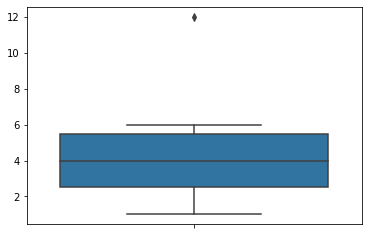

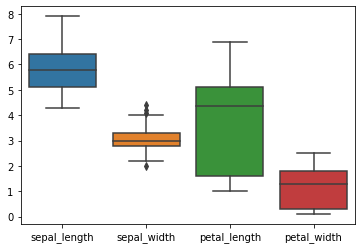

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
# Apêndice A. Boxplots usando seaborn 
def example1():
    mydata=[1,2,3,4,5,6,12]
    sns.boxplot(y=mydata) # Also accepts numpy arrays
    plt.show()
def example2():
    df = sns.load_dataset('iris')
    #returns a DataFrame object. This dataset has 150 examples.
    #print(df)
    # Make boxplot for each group
    sns.boxplot( data=df.loc[:,:] )
    # loc[:,:] means all lines and all columns
    plt.show()
example1()
example2()

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score#, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


oneNN = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(oneNN, iris_X, iris_y, cv=10)

print('fold accuracy:', scores)

mean = scores.mean()
std = scores.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(scores)))

print("MÉDIA E INTERVALO DE CONFIANÇA É OQ TEM Q SER MOSTRADO NO TRABALHO:")
print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % (inf, sup))  
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(oneNN, iris_X, iris_y, cv=5)
conf_mat = confusion_matrix(iris_y, y_pred)

print(conf_mat)



plt.matshow(conf_mat)
for i in range(len(conf_mat)):
    for j in range(len(conf_mat)):
        plt.text(i, j, conf_mat[i][j], va="center", ha="center")

plt.show()



NameError: name 'iris_X' is not defined

In [ ]:
import pandas as pd
df_cmap = pd.DataFrame(conf_mat, index = range(len(conf_mat)), columns = range(len(conf_mat)) )
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cmap, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True), annot=True) # font size
plt.tick_params(axis='both', which='major', labelsize=14, labelbottom = False, left=True, top = True, labeltop=True)
plt.show()

In [ ]:
# FURLAM ME MANDOU:
cross_validate(pipeline, X, y, 
               cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=36851234), 
               scoring=score)

clf = Pipeline([('transformer', StandardScaler()),
                (
                    'estimator', 
                    GridSearchCV( #Ciclo interno
                        models[c], 
                        param_grid=parameters[c], 
                        scoring=score, 
                        cv=RepeatedStratifiedKFold(
                                            n_splits=4, 
                                            n_repeats=3, 
                                            random_state=36851234)
                                            )
                )]).fit(X, y) 
# Grid search
pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', clf)])
cross_validate(pipeline, X, y, 
               cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=36851234),
               scoring=score)

## Etapa 1
### Classificadores que não possuem hiperparâmetros

In [126]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
wine = datasets.load_wine()
wine_X, wine_y = wine.data, wine.target


cncer = datasets.load_breast_cancer()
cncer_X, cncer_y = cncer.data, cncer.target

print(wine_X)


print(np.shape(wine_X), np.unique(wine_y))
print(np.shape(cncer_X), np.unique(cncer_y))

print(type(iris))
print(type(iris_X))
print(type(iris_y))

labels = np.unique(iris_y)
print (labels)
print (iris.data.shape, iris.target.shape)

print(iris_X)
print(iris_y)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
(178, 13) [0 1 2]
(569, 30) [0 1]
<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0 1 2]
(150, 4) (150,)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]


In [4]:
import warnings
import numpy as np
from scipy.stats import norm

# retorna um dict contendo media, variancia e limites inf & sup de uma lista de scores
def get_score_stts(scores):
    r = {}
    r["mean"], r["std"] = scores.mean(), scores.std()

    scale = r["std"]/np.sqrt(len(scores))
    with warnings.catch_warnings():
        if r["std"] == 0.0:
            warnings.simplefilter('ignore') #Ignora warning que são causados quando a variância = 0
        r["inf"], r["sup"] = np.nan_to_num(norm.interval(0.95, loc=r["mean"], scale=scale), nan=r["mean"])
        
    return r


In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Plota a matrix de confusão usando Heatmap do seaborn
def plot_conf_mat(conf_mat):
    df_cmap = pd.DataFrame(conf_mat, index = range(len(conf_mat)), columns = range(len(conf_mat)) )
    sns.set(font_scale=1.4) # for label size
    sns.heatmap(df_cmap, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True), annot=True) # font size
    plt.tick_params(axis='both', which='major', labelsize=14, labelbottom = False, left=True, top = True, labeltop=True)


In [7]:
rand_state = 36851234

In [8]:
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix#, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict



classifiers = {
    "ZeroR": DummyClassifier(strategy="most_frequent", random_state=rand_state),
    "Aleatorio": DummyClassifier(strategy="uniform", random_state=rand_state),
    "Aleatorio_Estrat": DummyClassifier(strategy="stratified", random_state=rand_state),
    # "OneR_Probab": {}, #Falta implementar
    "Naive_Bayes": GaussianNB()
}

# Dicionario que guardará os dados gerados de cada scores
results = dict.fromkeys(["ZeroR", "Aleatorio", "Aleatorio_Estrat", "Naive_Bayes"])

conf_mats = []

for key, classifier in classifiers.items(): 
    rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=rand_state)
    scores = cross_val_score(classifier, iris_X, iris_y, cv=rkf, scoring="accuracy")

    results[key] = get_score_stts(scores)

    y_pred = cross_val_predict(classifier, iris_X, iris_y, cv=10)
    conf_mats.append(confusion_matrix(iris_y, y_pred))

    print(key,'\n', conf_mats[-1])

results_df = pd.DataFrame(results).T
print(results_df)

ZeroR 
 [[50  0  0]
 [50  0  0]
 [50  0  0]]
Aleatorio 
 [[ 0 30 20]
 [10 30 10]
 [30 10 10]]
Aleatorio_Estrat 
 [[20  0 30]
 [10 30 10]
 [20 10 20]]
Naive_Bayes 
 [[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]
                      mean           std       inf       sup
ZeroR             0.333333  1.110223e-16  0.333333  0.333333
Aleatorio         0.266667  0.000000e+00  0.266667  0.266667
Aleatorio_Estrat  0.466667  0.000000e+00  0.466667  0.466667
Naive_Bayes       0.951111  5.144816e-02  0.932701  0.969521


### I/O: Saves plots and Write latex table in a txt file

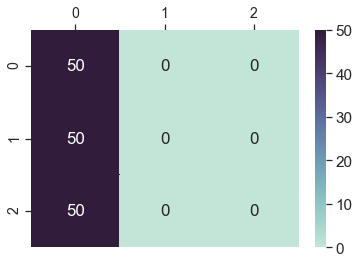

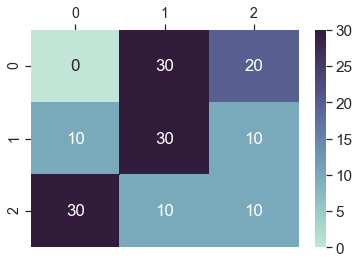

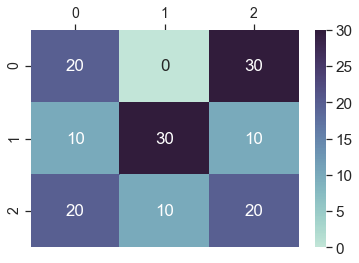

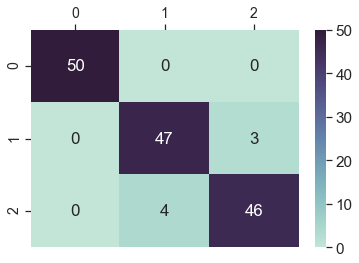

In [9]:
from pathlib import Path

# Salvar Plots no diretorio /plots
Path("plots/").mkdir(parents=True, exist_ok=True)
for c_mat in conf_mats:
    plot_conf_mat(c_mat)
    plt.savefig('plots/'+key+'_confusion_matrix.png', dpi=200)
    plt.show()

# Salvar tabela latex no diretorio /latex_tables
Path("latex_tables/").mkdir(parents=True, exist_ok=True)
with open('latex_tables/result_table.txt', 'w') as file:
    file.write(results_df.to_latex(float_format="%.2f"))

### Implementação do Kmeans para o kcentroides

In [10]:
from sklearn.cluster import KMeans

def kmeans(data, k):
    km = KMeans(n_clusters=k)#, random_state=rand_state)
    km.fit(data)
    return km.cluster_centers_
    

## Implementação do genetic Algorithm para o Kcentroids

In [25]:
import random as rand
import numpy as np
# from scipy.spatial.distance import cdist, sqeuclidean
from scipy.spatial.distance import cdist

# Utils
def evaluate_dists_state(min_dists):
    '''
        Return: SSE baseado na array de distancias
    '''
    return np.sum(min_dists)

def get_diff_obs_state(current_label, k):
    '''
        Retorna uma label diferente da label atual entre as k disponiveis
    '''
    new_label = rand.randint(0, k-1)
    while new_label == current_label:
        new_label = rand.randint(0, k-1)
    return new_label


class Clustering:
    '''Lida com a instãncia de um problema de clusterização.
    '''
    def __init__(self, data):
        '''valores do problema:
                data: ndarray size M x N
                    Cada linha da array é uma observação.
                    As colunas são os atributos de cada observação
                num_obs: int
                    Número de observações no dataset
                num_feat: int
                    numero de features (atributos) no dataset
        '''
        self.data = data
        self.num_obs = len(data)
        self.num_feat = len(data[0])

    def generate_initial_centroids(self, k):
        '''
            Seleciona aleatoriamente K linhas para serem os centroides
        '''
        points = np.random.choice(self.num_obs, size=k, replace=False)
        # print("points:", points. "\n")
        points = self.data[points].copy()
        # print("selected centroids:", points, "\n")
        return points

    def get_centroid(self):
        centroid = np.sum(self.data, axis=0)
        return (centroid / self.num_obs).tolist()

    def update_centroids(self, labels, k):
        """ Parameters:
                labels : int ndarray
                    array of the labels of the observations.
                k : int
                    The number of centroids (codes).
            Returns:
                centroids: k x n ndarray
                new centroids matrix
                has_members : ndarray
                    A boolean array indicating which clusters have members.
        """
        centroids = np.zeros((k, self.num_feat), dtype=self.data.dtype)

        # sum of the numbers of obs in each cluster
        obs_count = np.zeros(k, np.int)

        for i in range(self.num_obs):
            label = labels[i]
            obs_count[label] += 1
            centroids[label] += self.data[i]

        for i in range(k):
            cluster_size = obs_count[i]

            if cluster_size > 0:
                # Calculate the centroid of each cluster
                centroids[i] = centroids[i] / cluster_size

        # Return a boolean array indicating which clusters have members
        return centroids, obs_count > 0

    def update_centroids_safe(self, centroids, labels, k):
        """ Atualiza o estado da lista de centroides com base nas labels
            Difere da função update_centroids por corrigir internamente
            problemas de cluster sem membros
        """
        new_centroids, has_members = self.update_centroids(labels, k)
        # Caso algum centroide novo não possua membros, atribui a posicao anterior
        if not has_members.all():
            # Setting to previous centroid position
            new_centroids[~has_members] = centroids[~has_members]
        return new_centroids

    def assign_clusters(self, centroids):
        ''' Parametros:
                centroids: ndarray size k x N
                    Cada linha é um centroide
            Retornos:
                labels: ndarray size M
                    Uma array contendo o index do cluster atribuido a cada observacao
                min_dists: ndarray size M
                    Array contendo a distancia da i-ésima observação até o centroide mais proximo
        '''
        dists = cdist(self.data, centroids, 'sqeuclidean')
        labels = dists.argmin(axis=1)
        min_dists = dists[np.arange(len(labels)), labels]
        return labels, min_dists

    # GENTIC ALGORITHN
    def evaluate(self, state):
        """Retorna o sse de um centroide (state)"""
        min_dists = self.assign_clusters(state)[1]
        return evaluate_dists_state(min_dists)

    def gerar_populacao(self, populacao, t_pop, k):
        """Preenche uma população a partir do primeiro individuo da população dada
        """
        state = populacao[0]
        labels = self.assign_clusters(state)[0]

        while len(populacao) < t_pop:
            new_labels = labels.copy()
            rand_obs = rand.randrange(0, self.num_obs)

            new_labels[rand_obs] = get_diff_obs_state(labels[rand_obs], k)
            new_state, has_members = self.update_centroids(new_labels,k)

            if has_members.all():
                populacao.append(new_state)

    def selecao(self, states):
        """ função de selecao por roleta (mantendo um unico sobrevivente na população)
                1º: calcula as probabilidades de cada um sobreviver
                2º: calcula a faixa de sobrevivência
                3º: Roda a roleta
        """
        total = sum(list(map(self.evaluate, states)))
        percents = list(map(lambda s: (s, self.evaluate(s)/total),states))

        prob_ranges = list()
        low_bound = 0
        for s in percents:
            prob_ranges.append((s[0], low_bound, low_bound + s[1]))
            low_bound += s[1]

        n = rand.random()
        # n = rand.uniform(0,1)
        for prob in prob_ranges:
            if n >= prob[1] and n <= prob[2]:
                states.clear()
                states.append(prob[0])

    def mutacao(self, state):
        labels = self.assign_clusters(state)[0]
        k = len(state)

        # define aleatoriamente quantas mutacoes acontecerao nas labels (até 10)
        for _ in range(rand.randint(1,10)):
            rand_obs = rand.randrange(0, self.num_obs)
            labels[rand_obs] = get_diff_obs_state(labels[rand_obs], k)

        new_state = self.update_centroids_safe(state, labels, k)

        return new_state

    def melhor_da_geracao(self, states):
        num_pop = len(states)

        melhor = states[0].copy()
        melhor_sse = self.evaluate(states[0])

        for i in range(1, num_pop):
            sse = self.evaluate(states[i])
            if sse < melhor_sse:
                melhor = states[i].copy()
                melhor_sse = sse

        return melhor, melhor_sse

""" Metodo Algoritmo Genético
        Hiperparametros : 
            max_iter : número máximo de iterações (critério de parada)
            t_pop : tamanho da população
            taxa_cross : chance de ocorrer crossover
            taxa_mutacao : chance de ocorrer mutação

        Tipo : Baseada em Soluções Completas -> Busca Populacional -> Computação Evolutiva
"""
import time
import random as rand
import numpy as np

def ocorre(p):
    """Retorna se um evento com chance p ocorre ou não
    """
    n = rand.random()
    return  n <= p

def crossover(state1, state2):
    num_feat = len(state1)
    # Quantidade aleatoria de crossovers
    qtd = rand.randint(0, num_feat)

    for _ in range(qtd):
        gene = rand.randrange(num_feat)
        aux = state1[gene]
        state1[gene] = state2[gene]
        state2[gene] = aux


def genetic(problem: Clustering, k, t_pop, taxa_cross, taxa_mutacao, t = 1., max_sem_melhora = 20, max_iter = 3000):
    """ Parametros : 
            problem : uma instancia do problema de clustering
            k : quantidade de centroides
            t_pop : tamanho da população
            taxa_cross : chance de ocorrer crossover
            taxa_mutacao : chance de ocorrer mutação
            max_sem_melhora : quantidade maxima de iteracoes sem melhora (critério de parada)
            max_iter : número máximo de iterações (critério de parada)
            t : tempo
    """
    start = time.process_time()
    end = 0
    if k == 1:
        return [problem.get_centroid()], time.process_time()-start, 1

    melhor = problem.generate_initial_centroids(k)
    populacao = [melhor]

    melhor_sse = np.inf
    qtd_geracoes_sem_melhora = 0

    i = 0

    while i < max_iter and qtd_geracoes_sem_melhora < max_sem_melhora and end-start < t:
        # Seleciona um estado com potencial e gera a população
        problem.selecao(populacao)
        problem.gerar_populacao(populacao, t_pop, k)

        # Realiza um numero aleatorio de crossovers e mutacoes, 
        # entre metade do tamanho e o tamanho da populacao
        for _ in range(1, rand.randrange(t_pop//2,t_pop)):
            if end-start < t:
                break
            # Crossover
            if ocorre(taxa_cross):
                x = rand.randrange(len(populacao))
                y = rand.randrange(len(populacao))
                while x == y:
                    y = rand.randrange(len(populacao))
                crossover(populacao[x], populacao[y])
            # Mutacao
            if ocorre(taxa_mutacao):
                x = rand.randrange(len(populacao))
                populacao[x] = problem.mutacao(populacao[x])
                
            end = time.process_time()

        melhor_da_geracao, melhor_sse_geracao = problem.melhor_da_geracao(populacao)

        if melhor_sse_geracao < melhor_sse:
            melhor = melhor_da_geracao
            melhor_sse = melhor_sse_geracao
            qtd_geracoes_sem_melhora = 0
        else:
            qtd_geracoes_sem_melhora += 1

        i += 1
        end = time.process_time()

    return melhor, end-start, i

In [165]:
from collections import Counter
import numpy as np
from scipy.spatial.distance import cdist

from sklearn.base import BaseEstimator
from sklearn.utils.validation import check_X_y



class Kcentroides(BaseEstimator):
    def __init__(self, method=None, k=None):
        super().__init__()
        self.k = k
        self.method = method
    
    def fit(self,x_train,y_train):
        x_train,y_train = check_X_y(x_train,y_train)
        clss_names = np.unique(y_train)
        mapp = { k: i for i, k in  enumerate(clss_names)}
        

        # Faz uma lista de classes, mapeando as classes em indices
        x_classes = [[] for i in range(len(clss_names))]
        for observation, clss in zip(x_train, y_train):
            x_classes[mapp[clss]].append(observation)
        
        
        # gera os k centroids de cada classe
        c_classes = [[] for i in range(len(clss_names))]
        for clss, x_clss in enumerate(x_classes):
            # k = min(self.k, len(x_clss))
            c_classes[clss] = self.method(np.array(x_clss), self.k)

        self.__c_classes = np.asarray(c_classes)
        self.__clss_names = clss_names

    def predict(self,x_test):
        dist_array = [ np.min(cdist(x_test, c_clss, 'sqeuclidean'),axis=1) for c_clss in self.__c_classes]
        return self.__clss_names[np.argmin(dist_array, axis=0)]

In [148]:
a = np.array([1,2,3])
print(a[[0,0,1,2,2,]])
print(min(1,2))

[1 1 2 3 3]
1


### KGAcentroides

In [161]:
def kga(data, k):
    problem = Clustering(data)
    centroids, _, _ =  genetic(problem, k, t_pop=10, taxa_cross=0.95, taxa_mutacao=0.2, t = 1., max_sem_melhora = 10, max_iter = 3000)
    return centroids



In [167]:
import time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler

start = time.process_time()

scalar = StandardScaler()
kgaC = Kcentroides(method=kga)

pipeline = Pipeline([('transformer', scalar), ('estimator', kgaC)])

grade = {'estimator__k': [1,3,5,7]}

skf = StratifiedKFold(n_splits=4,random_state=rand_state, shuffle=True)
gs = GridSearchCV(estimator=pipeline, param_grid = grade, scoring='accuracy', cv = skf)
    
rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=rand_state)
scores = cross_val_score(gs, wine_X, wine_y, scoring='accuracy', cv = rkf)

print(scores)
print(get_score_stts(scores), "time:", time.process_time()-start )

[1.         1.         1.         0.94444444 0.94444444 0.94444444
 1.         1.         1.         0.82352941 1.         1.
 1.         1.         1.         0.83333333 1.         1.
 1.         0.88235294 0.94444444 1.         1.         0.94444444
 0.94444444 1.         0.94444444 0.94444444 0.94117647 1.        ]
{'mean': 0.9678649237472765, 'std': 0.048281172522289806, 'inf': 0.9505880455215407, 'sup': 0.9851418019730123} time: 63.094879999999876


fold accuracy:
 [0.61111111 0.5        0.66666667 0.77777778 0.55555556 0.55555556
 0.55555556 0.72222222 0.76470588 0.64705882 0.5        0.66666667
 0.72222222 0.66666667 0.61111111 0.66666667 0.66666667 0.66666667
 0.76470588 0.58823529 0.72222222 0.66666667 0.72222222 0.5
 0.61111111 0.55555556 0.66666667 0.72222222 0.64705882 0.58823529]
MÉDIA E INTERVALO DE CONFIANÇA É OQ TEM Q SER MOSTRADO NO TRABALHO:

Mean Accuracy: 0.64 Standard Deviation: 0.08
Accuracy Confidence Interval (95%): (0.61, 0.67)

time:  2.4021599999999808
[[49  4  6]
 [ 6 35 30]
 [ 2 16 30]]


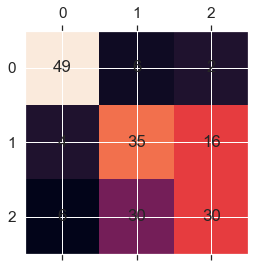

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score#, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


oneNN =Kcentroides(method=kmeans, k=7)
start = time.process_time()
rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=rand_state)

scores = cross_val_score(oneNN, wine_X, wine_y, cv=rkf, scoring="accuracy")


print('fold accuracy:\n', scores)

mean = scores.mean()
std = scores.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(scores)))

print("MÉDIA E INTERVALO DE CONFIANÇA É OQ TEM Q SER MOSTRADO NO TRABALHO:")
print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % (inf, sup))  

print("time: ", time.process_time()-start)
from sklearn.model_selection import cross_val_predict


rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=rand_state)
y_pred = cross_val_predict(oneNN, wine_X, wine_y, cv=rkf)
conf_mat = confusion_matrix(wine_y, y_pred)

print(conf_mat)



plt.matshow(conf_mat)
for i in range(len(conf_mat)):
    for j in range(len(conf_mat)):
        plt.text(i, j, conf_mat[i][j], va="center", ha="center")

plt.show()